In [22]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import random

## Load Data


In [23]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_num = len(class_names)

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


## Visualization

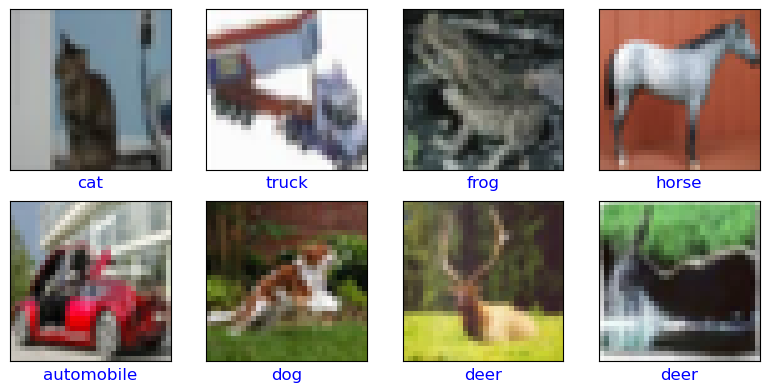

In [26]:
nrows, ncols = 2, 4
fig, axes = plt.subplots(nrows, ncols, figsize = (8,4))

for i in range(nrows*ncols):
    ax = axes[i//ncols, i%ncols]
    IMG_INDEX = random.randint(0,x_train.shape[0]) # change this to look at other images
    
    ax.imshow(x_train[IMG_INDEX] ,cmap=plt.cm.binary)
    ax.set(xticks=[], yticks=[])
    
    true_label_str = class_names[y_train[IMG_INDEX][0]]
    ax.set_xlabel(true_label_str, color = 'blue', fontsize = 12)
    
plt.tight_layout()
plt.show()

# Normalize pixel values to between 0 and 1 

In [27]:
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) /255

y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

# CNN Architecture

In [35]:
model = keras.models.Sequential([
    layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(class_num, activation="softmax"),
])

In [36]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics='accuracy')

In [37]:
history = model.fit(x_train,y_train_label,
                    epochs = 10,
                    validation_split=0.1,
                    batch_size=100
                   )

Epoch 1/10
450/450 [==============================] - 7s 13ms/step - loss: 1.6149 - accuracy: 0.4062 - val_loss: 1.2552 - val_accuracy: 0.5444
Epoch 2/10
450/450 [==============================] - 6s 13ms/step - loss: 1.2082 - accuracy: 0.5675 - val_loss: 1.0380 - val_accuracy: 0.6316
Epoch 3/10
450/450 [==============================] - 6s 13ms/step - loss: 1.0284 - accuracy: 0.6345 - val_loss: 0.8960 - val_accuracy: 0.6898
Epoch 4/10
450/450 [==============================] - 6s 14ms/step - loss: 0.9070 - accuracy: 0.6804 - val_loss: 0.8183 - val_accuracy: 0.7172
Epoch 5/10
450/450 [==============================] - 6s 14ms/step - loss: 0.8202 - accuracy: 0.7100 - val_loss: 0.7662 - val_accuracy: 0.7328
Epoch 6/10
450/450 [==============================] - 7s 15ms/step - loss: 0.7454 - accuracy: 0.7372 - val_loss: 0.7410 - val_accuracy: 0.7374
Epoch 7/10
450/450 [==============================] - 6s 14ms/step - loss: 0.6866 - accuracy: 0.7587 - val_loss: 0.6857 - val_accuracy: 0.7612

In [38]:
test_loss, test_acc = model.evaluate(x_test, y_test_label, verbose=1)
print(test_acc)
print(test_loss)

313/313 [==============================] - 2s 4ms/step - loss: 0.6671 - accuracy: 0.7721
0.7720999717712402
0.6671326160430908


In [39]:
pred = model.predict(x_test)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 [==============================] - 1s 3ms/step
[[6.5685716e-03 1.3938678e-03 1.8753314e-02 ... 3.1666218e-03
  3.9087851e-02 2.7954949e-03]
 [1.6064737e-03 2.4522643e-03 1.3683742e-08 ... 7.5789285e-11
  9.9525261e-01 6.8829057e-04]
 [5.1076394e-02 2.4769362e-02 4.7744266e-04 ... 1.5858075e-04
  9.0289414e-01 1.7563723e-02]
 ...
 [7.4421972e-05 5.2624491e-06 1.2016125e-01 ... 8.8814870e-02
  7.9207375e-06 2.1602640e-05]
 [1.2907642e-01 5.4713219e-01 4.9276985e-03 ... 6.8154000e-03
  1.6454110e-04 6.2802516e-02]
 [5.6698475e-08 2.2926778e-09 1.2592027e-06 ... 9.9883121e-01
  7.3271944e-10 4.4363983e-08]]
[3 8 8 ... 5 1 7]


In [40]:
model.save('model.h5')

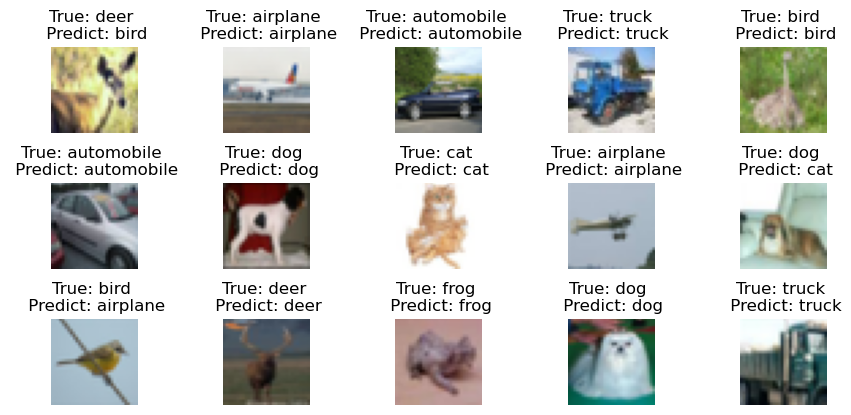

In [41]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(3, 5, figsize=(10,5))
axes = axes.ravel()

for i in np.arange(0, 15):
    random_index = random.randint(0,x_test.shape[0])
    axes[i].imshow(x_test[random_index])
    axes[i].set_title(f"True: {class_names[y_test[random_index][0]]} \n Predict: {class_names[pred_classes[random_index]]}")
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)
    
plt.show()

Text(0.5, 1.0, 'Loss Curves')

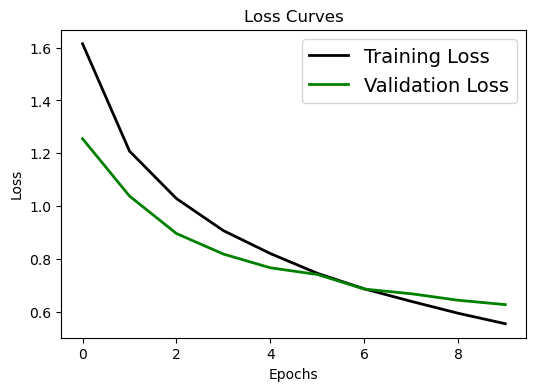

In [42]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

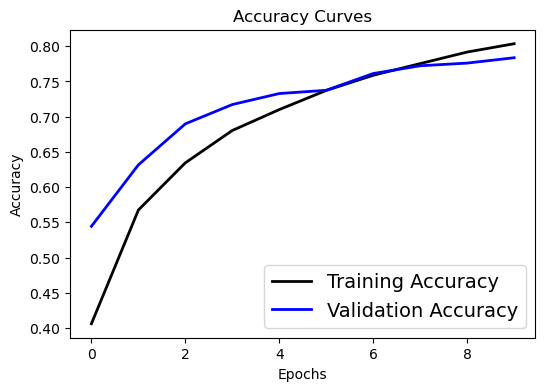

In [43]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)